<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Преобразование-категориальных-признаков" data-toc-modified-id="Преобразование-категориальных-признаков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Преобразование категориальных признаков</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li><li><span><a href="#обучение-моделей-на-несбалансированном-датасете" data-toc-modified-id="обучение-моделей-на-несбалансированном-датасете-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>обучение моделей на несбалансированном датасете</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span><ul class="toc-item"><li><span><a href="#Вывод-Взвешиванине-классов" data-toc-modified-id="Вывод-Взвешиванине-классов-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Вывод Взвешиванине классов</a></span></li></ul></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span><ul class="toc-item"><li><span><a href="#Вывод-при-увеличении-выборки-показатели-у-моделей-следующие**" data-toc-modified-id="Вывод-при-увеличении-выборки-показатели-у-моделей-следующие**-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Вывод при увеличении выборки показатели у моделей следующие**</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Описание проекта

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

# Цель проекта

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 


## Подготовка данных

In [1]:
# Импорт модулей

import pandas as pd
from sklearn.model_selection import train_test_split
# логичтическая регрессия
from sklearn.linear_model import LogisticRegression
# Дерево решений
from sklearn.tree import DecisionTreeClassifier
# Случайный лес
from sklearn.ensemble import RandomForestClassifier
# Порядковое кодирование
from sklearn.preprocessing import OrdinalEncoder
# метрика accuracy_score
from sklearn.metrics import accuracy_score

# стандартизация
from sklearn.preprocessing import StandardScaler
# матрица ошибок
from sklearn.metrics import confusion_matrix

# Полнота 
from sklearn.metrics import recall_score

# точность
from sklearn.metrics import precision_score

# F-1 мера
from sklearn.metrics import f1_score

# метрика AUC-ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# перемешивание
from sklearn.utils import shuffle

pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

# для индикации
from tqdm import tqdm
import os

# дял отрисовки графиков
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('/datasets/Churn.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


**Признаки** 

* 	RowNumber — индекс строки в данных
*	CustomerId — уникальный идентификатор клиента
*	Surname — фамилия
*	CreditScore — кредитный рейтинг
*	Geography — страна проживания
*	Gender — пол
*	Age — возраст
*	Tenure — сколько лет человек является клиентом банка
*	Balance — баланс на счёте
*	NumOfProducts — количество продуктов банка, используемых клиентом
*	HasCrCard — наличие кредитной карты
*	IsActiveMember — активность клиента
*	EstimatedSalary — предполагаемая зарплата

**Целевой признак**

*	Exited — факт ухода клиента


In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
# Посмотрим пропуски
data.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

пропуски в столбце с данными о количестве лет. Заменим их на нули

In [7]:
data['Tenure'] = data['Tenure'].fillna(0)
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [8]:
# Пропуски убрали
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [9]:
# Смотрим дубли
data.duplicated().sum()

0

Дублей нет

In [10]:
# Для прогнозирования не нужны данные, такие как Фамилия, Индекс строки и идентификатор клиента
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [12]:
data

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


Проверим на целево признаке, сбалансированы ли данные

<AxesSubplot:>

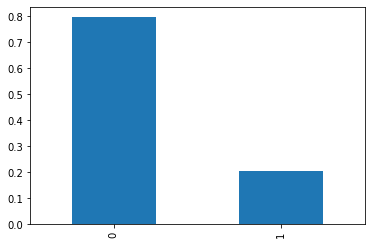

In [13]:
(
data['Exited']
    .value_counts(normalize=True)
    .plot(kind='bar')
)

In [14]:
len(data.query('Exited == 0')) / len(data.query('Exited == 1'))

3.9091801669121256

Данные не сбалансированы, поэтому при делении на выброки нужна будет стратификация 

### Вывод

- Были подгружены данные
- Обработаны пропуски
- Произведена проверка на наличие дубликатов
- Из признаков (столбцов) были исключены ненужные 
- Категориальные признаки - **Geography** и **Gender**. Необходимо преобрахование признаков, используем прямое кодирование (OHE)
- в стобце о кредитном рейтинге трехзначные числа, возраст - двузначные, остальные столбцы -однозначные. Столбец о зарплате - шестизначный. Неообходимо производить масштабировние признаков

## Исследование задачи

### Преобразование категориальных признаков

In [15]:
# Кодируем категориальные признаки
data_ohe = pd.get_dummies(data, drop_first=True)

In [16]:
# Подготовим признаки и целевой признак, Тренировочную  валидационную выборки

target = data_ohe['Exited']
features = data_ohe.drop('Exited', axis=1)
features_train, features_valid_all, target_train, target_valid_all = train_test_split(features, target, test_size=0.4, random_state=12345, stratify=target)
features_valid, features_test, target_valid, target_test = train_test_split(features_valid_all, target_valid_all, test_size=0.5, random_state=12345, stratify=target_valid_all)

print('Обучающая выборка:', features_train.shape, 'в процентах:', round((features_train.shape[0])/len(data)*100, 2),'%')
print('Валидационная выборка:', features_valid.shape, 'в процентах:', round((features_valid.shape[0])/len(data)*100, 2),'%')
print('Тестовая выборка:', features_valid.shape, 'в процентах:', round((features_test.shape[0])/len(data)*100, 2),'%')


Обучающая выборка: (6000, 11) в процентах: 60.0 %
Валидационная выборка: (2000, 11) в процентах: 20.0 %
Тестовая выборка: (2000, 11) в процентах: 20.0 %


### Масштабирование признаков

In [17]:
data_ohe.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Geography_Germany',
       'Geography_Spain', 'Gender_Male'],
      dtype='object')

In [18]:
# масштабирование признаков необходимо
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape)

(6000, 11)
(2000, 11)
(2000, 11)


###  обучение моделей на несбалансированном датасете

In [19]:
# Используем логистическую регрессию
model = LogisticRegression(solver='liblinear', random_state=12345)
model.fit(features_train, target_train)

predicted_valid = model.predict(features_valid)

# Метрика AUC-ROC
probabilities_valid_logist = model.predict_proba(features_valid)
probabilities_one_valid_logist = probabilities_valid_logist[:, 1]
auc_roc_logist = roc_auc_score(target_valid, probabilities_one_valid_logist)

print('Модель: Логистическая регрессия, валидационая выборка')
print(confusion_matrix(target_valid, predicted_valid))
print('Доля верных решений (Accuracy):', model.score(features_valid, target_valid))
print('Полнота: ', recall_score(target_valid, predicted_valid))
print('Точность:', precision_score(target_valid, predicted_valid))
print('F-1 мера:', f1_score(target_valid, predicted_valid))
print('Метрика AUC_ROC:', auc_roc_logist)

Модель: Логистическая регрессия, валидационая выборка
[[1538   54]
 [ 325   83]]
Доля верных решений (Accuracy): 0.8105
Полнота:  0.2034313725490196
Точность: 0.6058394160583942
F-1 мера: 0.30458715596330277
Метрика AUC_ROC: 0.7875098531875061


In [20]:
# Использузем Решающее дерево
# Переберем глубину max_depth от 1 до 20, чтобы найти лучший accuracy

# список глубин решающего дерева
depth_tree = []
#список accuracy решающего дерева на валидационной выборке
accuracy_tree_valid = []
#список accuracy решающего дерева на тренировочной выборке
accuracy_tree_train = []
best_result_tree = 0
best_result_tree_f1 = 0
best_depth_tree = 0
best_model_tree = None
for depth in tqdm(range(1,20)):
#поместим в можел структуру решающего дерева
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
# обучим модель
    model_tree.fit(features_train, target_train)
# предскажем целевой признак на валидационной выборке
    prediction_valid_tree = model_tree.predict(features_valid)
    result_accuracy = accuracy_score(target_valid, prediction_valid_tree)
# F-1 мера    
    result_f1 = f1_score(target_valid, prediction_valid_tree)
# глубину в список
    depth_tree.append(depth)
# accuracy в  список
    accuracy_tree_valid.append(result_accuracy)
# добавим accuracy тренировочной выборки в список
    accuracy_tree_train.append(accuracy_score(target_train, model_tree.predict(features_train)))
    if result_f1 > best_result_tree_f1:
        best_model_tree = model_tree
        best_depth_tree = depth
        best_result_tree = result_accuracy
        best_result_tree_f1 = result_f1
        probabilities_valid_tree = model_tree.predict_proba(features_valid)
        probabilities_one_valid_tree = probabilities_valid_tree[:, 1]
        auc_roc_tree = roc_auc_score(target_valid, probabilities_one_valid_tree)

predicted_valid_tree = best_model_tree.predict(features_valid)
print('Модель: Решающее дерево, валидационая выборка')
print('Доля верных решений (Accuracy):', best_result_tree)
print('Метрика F-1 на валидационной выборке у Решающего дерева:', round(best_result_tree_f1, 2), 'Глубина:', best_depth_tree)  
print('Метрика AUC_ROC:', auc_roc_tree)
print('Полнота: ', recall_score(target_valid, predicted_valid_tree))
print('Точность:', precision_score(target_valid, predicted_valid_tree))
print(confusion_matrix(target_valid, predicted_valid_tree))


100%|██████████| 19/19 [00:00<00:00, 31.61it/s]


Модель: Решающее дерево, валидационая выборка
Доля верных решений (Accuracy): 0.859
Метрика F-1 на валидационной выборке у Решающего дерева: 0.59 Глубина: 7
Метрика AUC_ROC: 0.8247056360232534
Полнота:  0.5024509803921569
Точность: 0.721830985915493
[[1513   79]
 [ 203  205]]


In [21]:
# График accuracy для оценки, не переобучилась ли у нас модель
# Для отрисовки графика сделаем датасет
tree_graphic = pd.DataFrame(data = accuracy_tree_valid, columns = ['accuracy_tree_valid'], index = depth_tree)
tree_graphic['accuracy_tree_train'] = accuracy_tree_train
tree_graphic

,accuracy_tree_valid,accuracy_tree_train
1,0.7960,0.796333
2,0.8350,0.837500
3,0.8400,0.842167
4,0.8490,0.856167
5,0.8575,0.862500
6,0.8600,0.866000
7,0.8590,0.870833
8,0.8580,0.879167
9,0.8500,0.892167
10,0.8375,0.906000


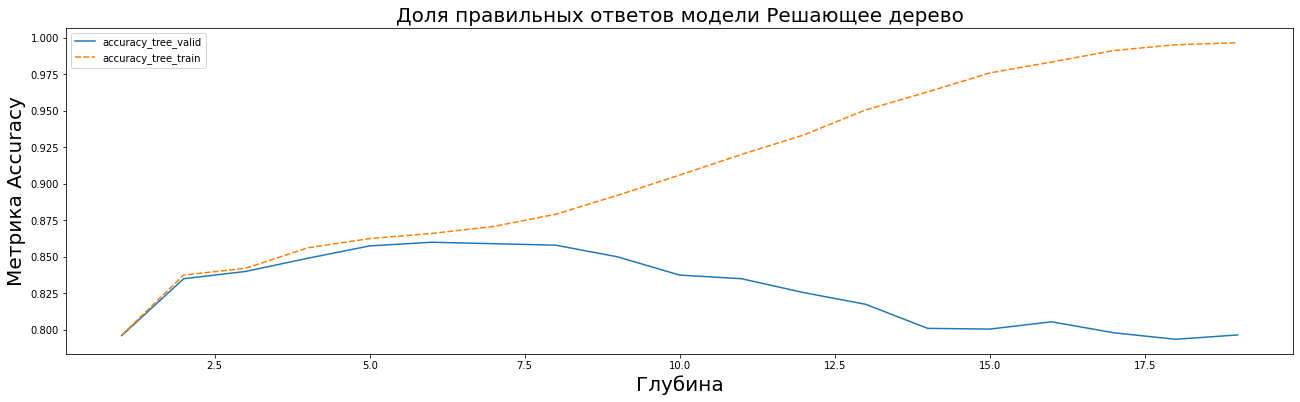

In [22]:
# График Accuracy
plt.figure(figsize=(22,6))

sns.lineplot(data=tree_graphic)
plt.title("Доля правильных ответов модели Решающее дерево", fontsize=20)
plt.xlabel("Глубина", fontsize=20)
plt.ylabel("Метрика Accuracy", fontsize=20)
plt.legend()
plt.show()

Лучшую метрику F-1 = 0.59 получили при глубине = 6. Из графика Accuracy решающего дерева видно, что при глубине, большей 6 модель начинает переобучаться.

In [23]:
%%time
# используем Случайный лес
best_model_forest = None
best_depth_forest = 0
best_est = 0
best_result_forest = 0
best_result_forest_f1 = 0
for est in tqdm(range(10, 151, 10)):
            #перебор по глубине
            for depth_forest in range(1, 11):
                model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth_forest, n_jobs=-1)
                model_forest.fit(features_train, target_train)
                predictions_forest = model_forest.predict(features_valid)
                result_forest = accuracy_score(target_valid, predictions_forest)
                result_forest_f1 = f1_score(target_valid, predictions_forest)
                if result_forest_f1 > best_result_forest_f1:
                    best_model_forest = model_forest
                    best_depth_forest = depth_forest
                    best_est = est
                    best_result_forest = result_forest
                    best_result_forest_f1 = result_forest_f1                    
probabilities_valid_forest = best_model_forest.predict_proba(features_valid)
probabilities_one_valid_forest = probabilities_valid_forest[:, 1]
auc_roc_forest = roc_auc_score(target_valid, probabilities_one_valid_forest)
                    
                    
predicted_valid_forest = best_model_forest.predict(features_valid)
print('Модель: Случайный лес, валидационая выборка')
print('Метрика F-1 на валидационной выборке у Случайного леса:', round(best_result_forest_f1, 2))  
print('Метрика AUC_ROC:', auc_roc_forest)
print("Доля правильных ответов Accuracy на валидационной выборке у Случайного леса:", round(best_result_forest, 2), 'Глубина:',best_depth_forest, 'Деревьев:', best_est)
print('Полнота: ', recall_score(target_valid, predicted_valid_forest))
print('Точность:', precision_score(target_valid, predicted_valid_forest))
print(confusion_matrix(target_valid, predicted_valid_forest))

100%|██████████| 15/15 [00:56<00:00,  3.75s/it]

Модель: Случайный лес, валидационая выборка
Метрика F-1 на валидационной выборке у Случайного леса: 0.6
Метрика AUC_ROC: 0.8697023721548921
Доля правильных ответов Accuracy на валидационной выборке у Случайного леса: 0.87 Глубина: 9 Деревьев: 20
Полнота:  0.48284313725490197
Точность: 0.8008130081300813
[[1543   49]
 [ 211  197]]
CPU times: user 55.8 s, sys: 360 ms, total: 56.1 s
Wall time: 56.4 s


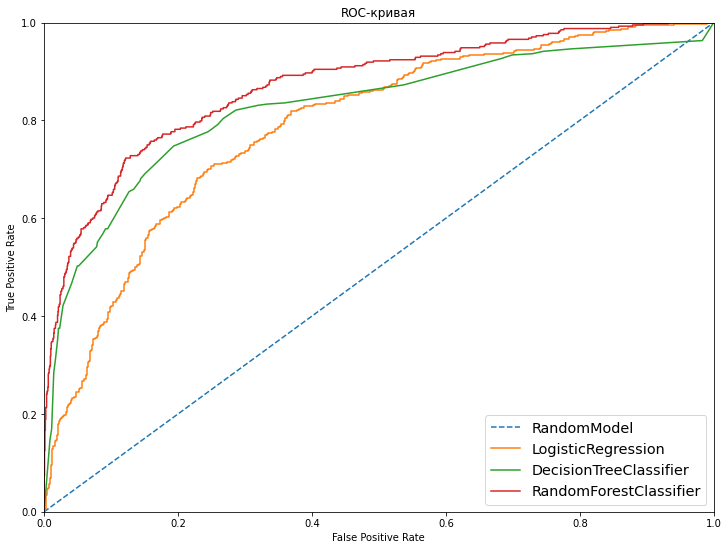

In [24]:
# График ROC-AUC

fpr_forest, tpr_forest, thresholds = roc_curve(target_valid, probabilities_one_valid_forest) # < напишите код здесь >
fpr_tree, tpr_tree, thresholds = roc_curve(target_valid, probabilities_one_valid_tree) # < напишите код здесь >#probabilities_one_valid_tree
fpr_logist, tpr_logist, thresholds = roc_curve(target_valid, probabilities_one_valid_logist) # < напишите код здесь >#probabilities_one_valid_tree


plt.figure(figsize=[12,9])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
plt.plot(fpr_logist, tpr_logist, label='LogisticRegression')
plt.plot(fpr_tree, tpr_tree, label='DecisionTreeClassifier')
plt.plot(fpr_forest, tpr_forest, label='RandomForestClassifier')
plt.legend(loc='lower right', fontsize='x-large')
plt.show()

### Вывод


* Логистическая регрессия: 
    - F-1 мера: 0.30458715596330277
    - Метрика AUC_ROC: 0.7875098531875061

* Решающее дерево:
    - Метрика F-1 на валидационной выборке у Решающего дерева: 0.59 Глубина: 7
    - Метрика AUC_ROC: 0.8247056360232534

* Случайный лес:
    - Метрика F-1 на валидационной выборке у Случайного леса: 0.6
    - Метрика AUC_ROC: 0.8697023721548921   
    
Лучшие показатели у Случайного леса

Все модели имеют метрику ROC-AUC больше 0.5
Лучший результат показала модель Случайного леса

## Борьба с дисбалансом

### Взвешивание классов

In [25]:
# Взвешивание классов  class_weight='balanced'
model = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)

# Метрика AUC-ROC
probabilities_valid_logist = model.predict_proba(features_valid)
probabilities_one_valid_logist = probabilities_valid_logist[:, 1]
auc_roc_logist = roc_auc_score(target_valid, probabilities_one_valid_logist)

print('Модель: Логистическая регрессия, валидационая выборка')
print(confusion_matrix(target_valid, predicted_valid))
print('Доля верных решений (Accuracy):', model.score(features_valid, target_valid))
print('Полнота: ', recall_score(target_valid, predicted_valid))
print('Точность:', precision_score(target_valid, predicted_valid))
print('F-1 мера:', f1_score(target_valid, predicted_valid))
print('Метрика AUC_ROC:', auc_roc_logist)

Модель: Логистическая регрессия, валидационая выборка
[[1163  429]
 [ 107  301]]
Доля верных решений (Accuracy): 0.732
Полнота:  0.7377450980392157
Точность: 0.4123287671232877
F-1 мера: 0.5289982425307558
Метрика AUC_ROC: 0.7937235195585772


In [26]:
# Решающее дерево

best_result_tree = 0
best_result_tree_f1 = 0
best_depth_tree = 0
best_model_tree = None
for depth in tqdm(range(1,20)):
#поместим в можел структуру решающего дерева
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth, class_weight='balanced')
# обучим модель
    model_tree.fit(features_train, target_train)
# предскажем целевой признак на валидационной выборке
    prediction_valid_tree = model_tree.predict(features_valid)
    result_accuracy = accuracy_score(target_valid, prediction_valid_tree)
# F-1 мера    
    result_f1 = f1_score(target_valid, prediction_valid_tree)
    if result_f1 > best_result_tree_f1:
        best_model_tree = model_tree
        best_depth_tree = depth
        best_result_tree = result_accuracy
        best_result_tree_f1 = result_f1
probabilities_valid_tree = best_model_tree.predict_proba(features_valid)
probabilities_one_valid_tree = probabilities_valid_tree[:, 1]
auc_roc_tree = roc_auc_score(target_valid, probabilities_one_valid_tree)

predicted_valid_tree = best_model_tree.predict(features_valid)
print('Модель: Решающее дерево, валидационая выборка')
print('Доля верных решений (Accuracy):', best_result_tree)
print('Метрика F-1 на валидационной выборке у Решающего дерева:', round(best_result_tree_f1, 2), 'Глубина:', best_depth_tree)  
print('Метрика AUC_ROC:', auc_roc_tree)
print('Полнота: ', recall_score(target_valid, predicted_valid_tree))
print('Точность:', precision_score(target_valid, predicted_valid_tree))
print(confusion_matrix(target_valid, predicted_valid_tree))

100%|██████████| 19/19 [00:00<00:00, 34.99it/s]

Модель: Решающее дерево, валидационая выборка
Доля верных решений (Accuracy): 0.771
Метрика F-1 на валидационной выборке у Решающего дерева: 0.58 Глубина: 6
Метрика AUC_ROC: 0.8234124051630702
Полнота:  0.7622549019607843
Точность: 0.46279761904761907
[[1231  361]
 [  97  311]]


In [27]:
%%time
# используем Случайный лес
best_model_forest = None
best_depth_forest = 0
best_est = 0
best_result_forest = 0
best_result_forest_f1 = 0
for est in tqdm(range(10, 151, 10)):
            #перебор по глубине
            for depth_forest in range(1, 11):
                model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth_forest, n_jobs=-1, class_weight='balanced')
                model_forest.fit(features_train, target_train)
                predictions_forest = model_forest.predict(features_valid)
                result_forest = accuracy_score(target_valid, predictions_forest)
                result_forest_f1 = f1_score(target_valid, predictions_forest)
                if result_forest_f1 > best_result_forest_f1:
                    best_model_forest = model_forest
                    best_depth_forest = depth_forest
                    best_est = est
                    best_result_forest = result_forest
                    best_result_forest_f1 = result_forest_f1                    
probabilities_valid_forest = best_model_forest.predict_proba(features_valid)
probabilities_one_valid_forest = probabilities_valid_forest[:, 1]
auc_roc_forest = roc_auc_score(target_valid, probabilities_one_valid_forest)
                    
                    
predicted_valid_forest = best_model_forest.predict(features_valid)
print('Модель: Случайный лес, валидационая выборка')
print('Метрика F-1 на валидационной выборке у Случайного леса:', round(best_result_forest_f1, 2))  
print('Метрика AUC_ROC:', auc_roc_forest)
#print("Доля правильных ответов Accuracy на валидационной выборке у Случайного леса:", round(best_result_forest, 2), 'Глубина:',best_depth_forest, 'Деревьев:', best_est, 'узлов:', best_split, 'Листьев:', best_leaf)
print("Доля правильных ответов Accuracy на валидационной выборке у Случайного леса:", round(best_result_forest, 2), 'Глубина:',best_depth_forest, 'Деревьев:', best_est)
print('Полнота: ', recall_score(target_valid, predicted_valid_forest))
print('Точность:', precision_score(target_valid, predicted_valid_forest))
print(confusion_matrix(target_valid, predicted_valid_forest))

100%|██████████| 15/15 [00:58<00:00,  3.90s/it]

Модель: Случайный лес, валидационая выборка
Метрика F-1 на валидационной выборке у Случайного леса: 0.66
Метрика AUC_ROC: 0.8704074908858016
Доля правильных ответов Accuracy на валидационной выборке у Случайного леса: 0.84 Глубина: 8 Деревьев: 150
Полнота:  0.7303921568627451
Точность: 0.5948103792415169
[[1389  203]
 [ 110  298]]
CPU times: user 58 s, sys: 484 ms, total: 58.5 s
Wall time: 58.6 s


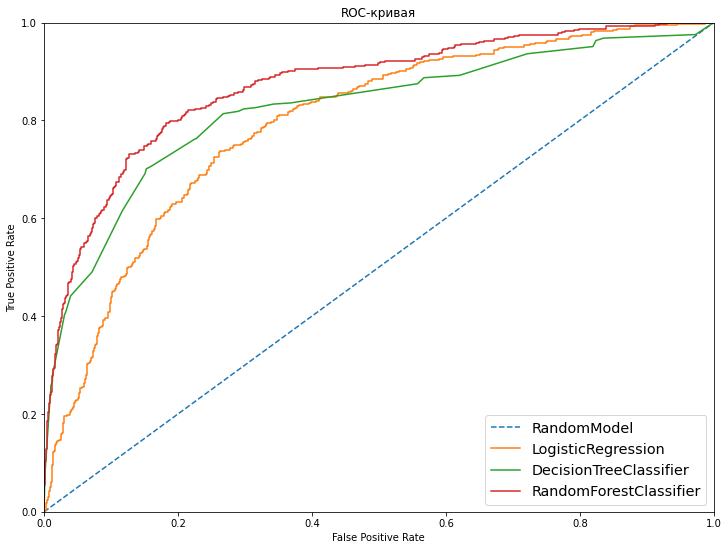

In [28]:
# График ROC-AUC

fpr_forest, tpr_forest, thresholds = roc_curve(target_valid, probabilities_one_valid_forest) # < напишите код здесь >
fpr_tree, tpr_tree, thresholds = roc_curve(target_valid, probabilities_one_valid_tree) # < напишите код здесь >#probabilities_one_valid_tree
fpr_logist, tpr_logist, thresholds = roc_curve(target_valid, probabilities_one_valid_logist) # < напишите код здесь >#probabilities_one_valid_tree


plt.figure(figsize=[12,9])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
plt.plot(fpr_logist, tpr_logist, label='LogisticRegression')
plt.plot(fpr_tree, tpr_tree, label='DecisionTreeClassifier')
plt.plot(fpr_forest, tpr_forest, label='RandomForestClassifier')
plt.legend(loc='lower right', fontsize='x-large')
plt.show()

#### Вывод Взвешиванине классов 


* Логистическая регрессия: 
    - F-1 мера: 0.5289982425307558
    - Метрика AUC_ROC: 0.7937235195585772

* Решающее дерево:
    - Метрика F-1 на валидационной выборке у Решающего дерева: 0.58 
    - Метрика AUC_ROC: 0.8234124051630702

* Случайный лес:
    - Метрика F-1 на валидационной выборке у Случайного леса: 0.66
    - Метрика AUC_ROC: 0.8704074908858016    
    
Лучшие показатели у Случайного леса

### Увеличение выборки


In [29]:
# функция для увеличения выборки

def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

In [30]:
# У нас дисбаланс 0 и 1 равен 3.9
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
print(target_upsampled.value_counts())

1    4888
0    4778
Name: Exited, dtype: int64


In [31]:
# Взвешивание классов  class_weight='balanced'
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

# Метрика AUC-ROC
probabilities_valid_logist = model.predict_proba(features_valid)
probabilities_one_valid_logist = probabilities_valid_logist[:, 1]
auc_roc_logist = roc_auc_score(target_valid, probabilities_one_valid_logist)

print('Модель: Логистическая регрессия, валидационая выборка')
print(confusion_matrix(target_valid, predicted_valid))
print('Доля верных решений (Accuracy):', model.score(features_valid, target_valid))
print('Полнота: ', recall_score(target_valid, predicted_valid))
print('Точность:', precision_score(target_valid, predicted_valid))
print('F-1 мера:', f1_score(target_valid, predicted_valid))
print('Метрика AUC_ROC:', auc_roc_logist)

Модель: Логистическая регрессия, валидационая выборка
[[1148  444]
 [ 105  303]]
Доля верных решений (Accuracy): 0.7255
Полнота:  0.7426470588235294
Точность: 0.40562248995983935
F-1 мера: 0.5246753246753246
Метрика AUC_ROC: 0.7937851019804907


In [32]:
%%time
# Решающее дерево
best_result_tree = 0
best_result_tree_f1 = 0
best_depth_tree = 0
best_model_tree = None
for depth in tqdm(range(1,20)):
#поместим в можел структуру решающего дерева
    model_tree = DecisionTreeClassifier(random_state=12345, max_depth=depth)
# обучим модель
    model_tree.fit(features_upsampled, target_upsampled)
# предскажем целевой признак на валидационной выборке
    prediction_valid_tree = model_tree.predict(features_valid)
    result_accuracy = accuracy_score(target_valid, prediction_valid_tree)
# F-1 мера    
    result_f1 = f1_score(target_valid, prediction_valid_tree)
    if result_f1 > best_result_tree_f1:
        best_model_tree = model_tree
        best_depth_tree = depth
        best_result_tree = result_accuracy
        best_result_tree_f1 = result_f1
probabilities_valid_tree = best_model_tree.predict_proba(features_valid)
probabilities_one_valid_tree = probabilities_valid_tree[:, 1]
auc_roc_tree = roc_auc_score(target_valid, probabilities_one_valid_tree)

predicted_valid_tree = best_model_tree.predict(features_valid)
print('Модель: Решающее дерево, валидационая выборка')
print('Доля верных решений (Accuracy):', best_result_tree)
print('Метрика F-1 на валидационной выборке у Решающего дерева:', round(best_result_tree_f1, 2), 'Глубина:', best_depth_tree)  
print('Метрика AUC_ROC:', auc_roc_tree)
print('Полнота: ', recall_score(target_valid, predicted_valid_tree))
print('Точность:', precision_score(target_valid, predicted_valid_tree))
print(confusion_matrix(target_valid, predicted_valid_tree))

100%|██████████| 19/19 [00:00<00:00, 26.28it/s]

Модель: Решающее дерево, валидационая выборка
Доля верных решений (Accuracy): 0.771
Метрика F-1 на валидационной выборке у Решающего дерева: 0.58 Глубина: 6
Метрика AUC_ROC: 0.8234278007685487
Полнота:  0.7622549019607843
Точность: 0.46279761904761907
[[1231  361]
 [  97  311]]
CPU times: user 661 ms, sys: 35.3 ms, total: 696 ms
Wall time: 742 ms


In [33]:
%%time
# используем Случайный лес
best_model_forest = None
best_depth_forest = 0
best_est = 0
best_result_forest = 0
best_result_forest_f1 = 0
for est in tqdm(range(10, 151, 10)):
            #перебор по глубине
            for depth_forest in range(1, 11):
                model_forest = RandomForestClassifier(random_state=12345, n_estimators=est, max_depth=depth_forest, n_jobs=-1)
                model_forest.fit(features_upsampled, target_upsampled)
                predictions_forest = model_forest.predict(features_valid)
                result_forest = accuracy_score(target_valid, predictions_forest)
                result_forest_f1 = f1_score(target_valid, predictions_forest)
                if result_forest_f1 > best_result_forest_f1:
                    best_model_forest = model_forest
                    best_depth_forest = depth_forest
                    best_est = est
                    best_result_forest = result_forest
                    best_result_forest_f1 = result_forest_f1                    
probabilities_valid_forest = best_model_forest.predict_proba(features_valid)
probabilities_one_valid_forest = probabilities_valid_forest[:, 1]
auc_roc_forest = roc_auc_score(target_valid, probabilities_one_valid_forest)
                    
                    
predicted_valid_forest = best_model_forest.predict(features_valid)
print('Модель: Случайный лес, валидационая выборка')
print('Метрика F-1 на валидационной выборке у Случайного леса:', round(best_result_forest_f1, 2))  
print('Метрика AUC_ROC:', auc_roc_forest)
#print("Доля правильных ответов Accuracy на валидационной выборке у Случайного леса:", round(best_result_forest, 2), 'Глубина:',best_depth_forest, 'Деревьев:', best_est, 'узлов:', best_split, 'Листьев:', best_leaf)
print("Доля правильных ответов Accuracy на валидационной выборке у Случайного леса:", round(best_result_forest, 2), 'Глубина:',best_depth_forest, 'Деревьев:', best_est)
print('Полнота: ', recall_score(target_valid, predicted_valid_forest))
print('Точность:', precision_score(target_valid, predicted_valid_forest))
print(confusion_matrix(target_valid, predicted_valid_forest))

100%|██████████| 15/15 [01:16<00:00,  5.10s/it]

Модель: Случайный лес, валидационая выборка
Метрика F-1 на валидационной выборке у Случайного леса: 0.64
Метрика AUC_ROC: 0.8741147526849935
Доля правильных ответов Accuracy на валидационной выборке у Случайного леса: 0.83 Глубина: 9 Деревьев: 110
Полнота:  0.7352941176470589
Точность: 0.5725190839694656
[[1368  224]
 [ 108  300]]
CPU times: user 1min 15s, sys: 451 ms, total: 1min 16s
Wall time: 1min 16s


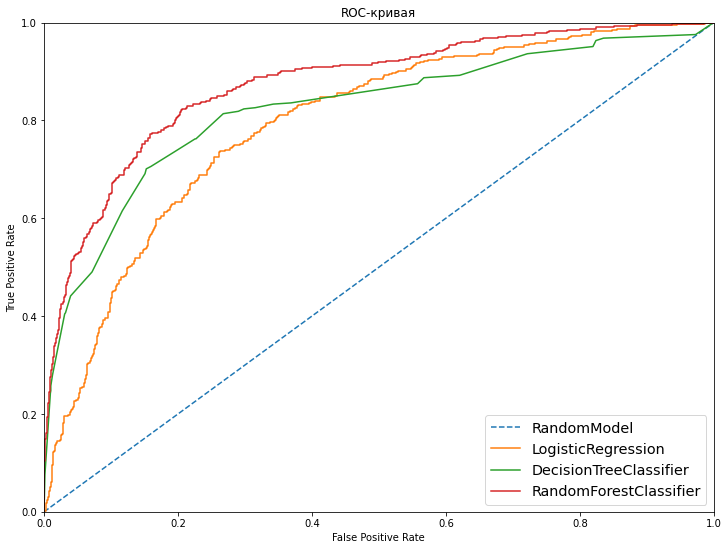

In [34]:
# График ROC-AUC

fpr_forest, tpr_forest, thresholds = roc_curve(target_valid, probabilities_one_valid_forest) # < напишите код здесь >
fpr_tree, tpr_tree, thresholds = roc_curve(target_valid, probabilities_one_valid_tree) # < напишите код здесь >#probabilities_one_valid_tree
fpr_logist, tpr_logist, thresholds = roc_curve(target_valid, probabilities_one_valid_logist) # < напишите код здесь >#probabilities_one_valid_tree


plt.figure(figsize=[12,9])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
plt.plot(fpr_logist, tpr_logist, label='LogisticRegression')
plt.plot(fpr_tree, tpr_tree, label='DecisionTreeClassifier')
plt.plot(fpr_forest, tpr_forest, label='RandomForestClassifier')
plt.legend(loc='lower right', fontsize='x-large')
plt.show()

#### Вывод при увеличении выборки показатели у моделей следующие**

* Логистическая регрессия: 
    - F-1 мера: 0.5246753246753246
    - Метрика AUC_ROC: 0.7937851019804907

* Решающее дерево:
    - Метрика F-1 на валидационной выборке у Решающего дерева: 0.58 Глубина: 6
    - Метрика AUC_ROC: 0.8234278007685487

* Случайный лес:
    - Метрика F-1 на валидационной выборке у Случайного леса: 0.64
    - Метрика AUC_ROC: 0.8741147526849935
    
Лучшие показатели у Случайного леса

### Вывод

* В борьбе с дисбалансом были применены методы:
    - Взвешивания классов
    - Увеличение выборки
* Оба метода дали положительные результаты по улучшению метрик F-1 и ROC-AUC
* Лучшие показатели у Случайного леса, применяемый метод для устранения дисбаланса:  взвешивание классов
    * Случайный лес:
        - Метрика F-1 на валидационной выборке у Случайного леса: 0.66
        - Метрика AUC_ROC: 0.8704074908858016    
    


## Тестирование модели

In [35]:
# Лучшие показатели F-1 и AUC-ROC у случайного леса с параметрами доереьев: Глубина: 8 Деревьев: 150
# переобучим модель с этими параметрами на общей выборке train+valid
model_forest = RandomForestClassifier(random_state=12345, n_estimators=150, max_depth=8, n_jobs=-1, class_weight='balanced')
model_forest.fit(features_train.append(features_valid, ignore_index=True), target_train.append(target_valid, ignore_index=True))

predictions_forest = model_forest.predict(features_test)
result_forest = accuracy_score(target_test, predictions_forest)
result_forest_f1 = f1_score(target_test, predictions_forest)
probabilities_test_forest = model_forest.predict_proba(features_test)
probabilities_one_test_forest = probabilities_test_forest[:, 1]
auc_roc_forest = roc_auc_score(target_test, probabilities_one_test_forest)
                    
                    
predicted_test_forest = model_forest.predict(features_test)
print('Модель: Случайный лес, тестовая выборка')
print('Метрика F-1 на валидационной выборке у Случайного леса:', round(result_forest_f1, 2))  
print('Метрика AUC_ROC:', auc_roc_forest)
#print("Доля правильных ответов Accuracy на валидационной выборке у Случайного леса:", round(best_result_forest, 2), 'Глубина:',best_depth_forest, 'Деревьев:', best_est, 'узлов:', best_split, 'Листьев:', best_leaf)
print("Доля правильных ответов Accuracy на валидационной выборке у Случайного леса:", round(result_forest, 2))
print('Полнота: ', recall_score(target_test, predicted_test_forest))
print('Точность:', precision_score(target_test, predicted_test_forest))
print(confusion_matrix(target_test, predicted_test_forest))

Модель: Случайный лес, тестовая выборка
Метрика F-1 на валидационной выборке у Случайного леса: 0.61
Метрика AUC_ROC: 0.85916116424591
Доля правильных ответов Accuracy на валидационной выборке у Случайного леса: 0.82
Полнота:  0.687960687960688
Точность: 0.5533596837944664
[[1367  226]
 [ 127  280]]


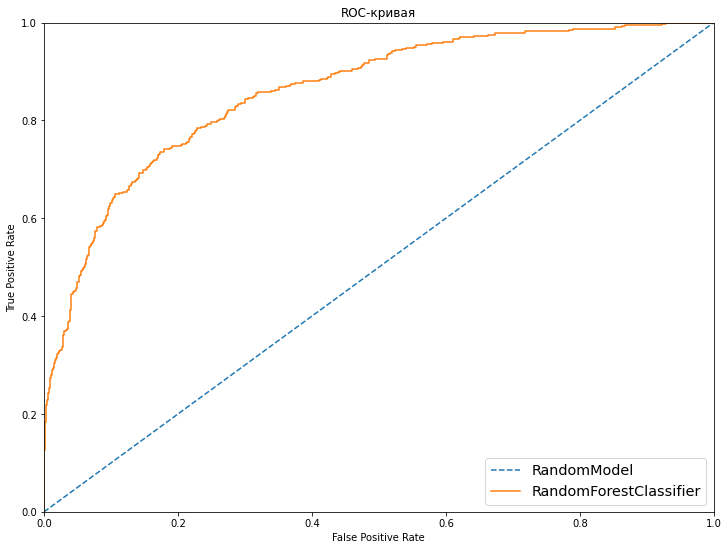

In [36]:
# График AUC-ROC
fpr_forest, tpr_forest, thresholds = roc_curve(target_test, probabilities_one_test_forest)


plt.figure(figsize=[12,9])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--', label='RandomModel')
plt.plot(fpr_forest, tpr_forest, label='RandomForestClassifier')
plt.legend(loc='lower right', fontsize='x-large')
plt.show()

## Вывод

**Тестирование модели показало результат:**

- Модель: Случайный лес, тестовая выборка
- Метрика F-1 на валидационной выборке у Случайного леса: 0.61
- Метрика AUC_ROC: 0.85916116424591
- Доля правильных ответов Accuracy на валидационной выборке у Случайного леса: 0.82

Наша модель получила результат по метрике F-1 больший, нежели указан в задании.
Метрика AUC-ROC = 0.86 показвывает, что модель предсказывает уход клиента лучше, чем случайная модель, где вероятность угадать равна 0.5